<a href="https://colab.research.google.com/github/Gurushankar2025/neural-word-embeddings/blob/main/projects/resume_screeningResume_Screening_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Resume screening using Gensim(Word2vec)**

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 618.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
open

In [ ]:
!pip install python-levenshtein                           #similarity between string will be more better. If want to use similarity function that is.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 832.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.7 MB/s eta 0:00:00


In [ ]:
#Download and import Gensim word2vec-google-news-300 using dnloader package

import gensim.downloader as api
from gensim.utils import simple_preprocess

In [ ]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
!pip install imbalanced-learn                                  #To balance an imbalanced dataset

In [ ]:
#import library
import pandas as pd

### **Data Preprocessing**

In [ ]:
df=pd.read_csv('AI_Resume_Screening.csv')

In [ ]:
df.shape

(1000, 14)

In [ ]:
df['Job_result']=df['Recruiter Decision'].map({'Hire':1,'Reject':0})            #creating label in numeric using map function

In [ ]:
 #merge the columns to get a single input text column

column_to_merge=['Skills', 'Experience (Years)', 'Education','Certifications', 'Job Role','Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']
df['reusme_text']=df[column_to_merge].astype(str).agg(','.join,axis=1)

In [ ]:
df['reusme_text'].head(10)

,reusme_text
0,"TensorFlow, NLP, Pytorch,10,B.Sc,nan,AI Resear..."
1,"Deep Learning, Machine Learning, Python, SQL,1..."
2,"Ethical Hacking, Cybersecurity, Linux,1,MBA,De..."
3,"Python, Pytorch, TensorFlow,7,B.Tech,AWS Certi..."
4,"SQL, React, Java,4,PhD,nan,Software Engineer,8..."
5,"Cybersecurity, Networking, Linux, Ethical Hack..."
6,"Networking, Cybersecurity, Ethical Hacking,4,M..."
7,"TensorFlow, Pytorch, NLP,3,M.Tech,AWS Certifie..."
8,"Networking, Ethical Hacking,7,MBA,Deep Learnin..."
9,"Python, TensorFlow, Pytorch, NLP,0,M.Tech,AWS ..."


In [ ]:
df['reusme_text'].shape

(1000,)

In [ ]:
#Vectorization using word2vec.get_mean_vector

df['data_Vector']=df['reusme_text'].apply(lambda text:wv.get_mean_vector(simple_preprocess(text)))   #return all tokens(each size is 300) mean as a vector of size 300

In [ ]:
df['data_Vector'][0].shape

(300,)

In [ ]:
df.Job_result.value_counts()                           # As we can see there is an imbalance in the data, To solve this we use Smote(Synthetic minimal Over-sampling)

,count
Job_result,
1,812
0,188


In [ ]:
import numpy as np

X_vectors = np.vstack(df['data_Vector'].values)    # Stack all vectors into a single 2D numpy array


In [ ]:
X_vectors.shape

(1000, 300)

In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy=0.95,random_state=15)
X_resample,Y_resample = smote.fit_resample(X_vectors,df.Job_result)

In [ ]:
X_resample.shape

(1583, 300)

In [ ]:
pd.Series(Y_resample).value_counts()      # Now It is balanced

,count
Job_result,
1,812
0,771


In [ ]:
from sklearn.preprocessing import MinMaxScaler         #Scale the values for classifiers

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resample)

In [ ]:
X_scaled.shape

(1583, 300)

### **Train-Test Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(
    X_scaled,
    Y_resample,
    test_size=0.2,
    random_state=15
    )
xtrain.shape

(1266, 300)

### **Model Training and Testing**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier      #KNN

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain,ytrain)

KNeighborsClassifier()

### **Result and Report**

In [ ]:
y_predict=model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       159
           1       0.76      0.70      0.73       158

    accuracy                           0.74       317
   macro avg       0.74      0.74      0.74       317
weighted avg       0.74      0.74      0.74       317



### **Confusion Matrix**

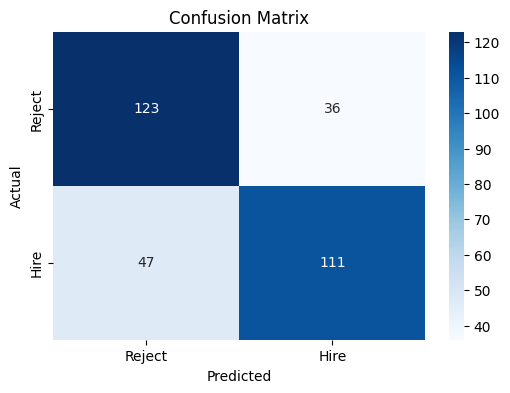

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Plot with seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Reject', 'Hire'],
            yticklabels=['Reject', 'Hire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()